# Exploration 1
Part of exploration initial exploration process

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def toMillion(amount):
    return round(amount / 1000000, 2)

def toBillion(amount):
    return round(amount / 1000000000, 2)

def toTrillion(amount):
    return round(amount / 1000000000000, 10)

In [3]:
df = pd.read_csv("../data/tax_data_2020.csv")
df             = df[df.zipcode != 0]
df["agi_stub"] = df["agi_stub"].astype("category") 
df["STATE"]    = df["STATE"].astype("category")

In [4]:
df.head(10)

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
6,1,AL,35004,1,1460.0,1010.0,200.0,210.0,1340.0,40.0,...,0.0,0.0,110.0,80.0,1210.0,2807.0,1210.0,2795.0,0.0,0.0
7,1,AL,35004,2,1400.0,760.0,280.0,310.0,1310.0,40.0,...,0.0,0.0,190.0,194.0,1210.0,3378.0,1200.0,3335.0,30.0,62.0
8,1,AL,35004,3,1020.0,460.0,350.0,190.0,970.0,30.0,...,0.0,0.0,230.0,357.0,800.0,2131.0,790.0,2119.0,0.0,0.0
9,1,AL,35004,4,630.0,140.0,420.0,60.0,590.0,0.0,...,0.0,0.0,180.0,386.0,450.0,1282.0,440.0,1276.0,0.0,0.0
10,1,AL,35004,5,810.0,80.0,710.0,20.0,760.0,20.0,...,0.0,0.0,290.0,1124.0,530.0,1967.0,510.0,1925.0,20.0,139.0
11,1,AL,35004,6,100.0,0.0,100.0,0.0,90.0,0.0,...,30.0,68.0,50.0,1189.0,50.0,857.0,40.0,426.0,0.0,0.0
12,1,AL,35005,1,1380.0,860.0,140.0,350.0,1260.0,60.0,...,0.0,0.0,100.0,82.0,1200.0,3598.0,1200.0,3594.0,0.0,0.0
13,1,AL,35005,2,1120.0,520.0,190.0,370.0,1040.0,0.0,...,0.0,0.0,160.0,197.0,950.0,3106.0,950.0,3106.0,0.0,0.0
14,1,AL,35005,3,510.0,190.0,170.0,130.0,460.0,30.0,...,0.0,0.0,120.0,236.0,390.0,1030.0,380.0,1029.0,0.0,0.0
15,1,AL,35005,4,220.0,50.0,130.0,50.0,190.0,0.0,...,0.0,0.0,60.0,174.0,160.0,502.0,160.0,500.0,0.0,0.0


### Reinvestigating Flat Income Tax using correct Tax values

In [6]:
total_adjust_gross_income = toTrillion(df['A00100'].sum()* 1000)

total_taxable_income_amount = toTrillion(df['A04800'].sum() *1000)

total_revenue_from_taxes = toTrillion(df["A06500"].sum() * 1000)

In [7]:
total_revenue_from_taxes/total_adjust_gross_income*100

13.163507716043116

In [8]:
total_revenue_from_taxes/total_taxable_income_amount*100

17.281374103053835

Looks like a flat income tax rate of about 17.28% would keep the revenue collected from taxes the same for the government

This value makes a lot more sense than the previous value that I got

### Interested in how this number potentially varies by state

In [9]:
gp = df.groupby(['STATE'])[['A00100','A04800','A06500']].sum()
gp.A04800 = toTrillion(gp.A04800*1000)
gp.A06500 = toTrillion(gp.A06500*1000)
gp['flat_income_tax_rate'] = gp.A06500/gp.A04800 * 100
gp

,A00100,A04800,A06500,flat_income_tax_rate
STATE,,,,
AK,2.647353e+07,0.020193,0.003144,15.568398
AL,1.382928e+08,0.098004,0.014796,15.097309
AR,8.395220e+07,0.057904,0.008616,14.880267
AZ,2.441997e+08,0.181115,0.029446,16.257961
CA,1.810625e+09,1.422985,0.270182,18.987004
CO,2.544586e+08,0.198014,0.034018,17.179453
CT,1.913297e+08,0.154761,0.030652,19.806131
DC,3.941942e+07,0.032805,0.006854,20.893516
DE,3.689880e+07,0.027707,0.004377,15.796509


<AxesSubplot: xlabel='STATE', ylabel='Calculated Flat Income Tax Rate'>

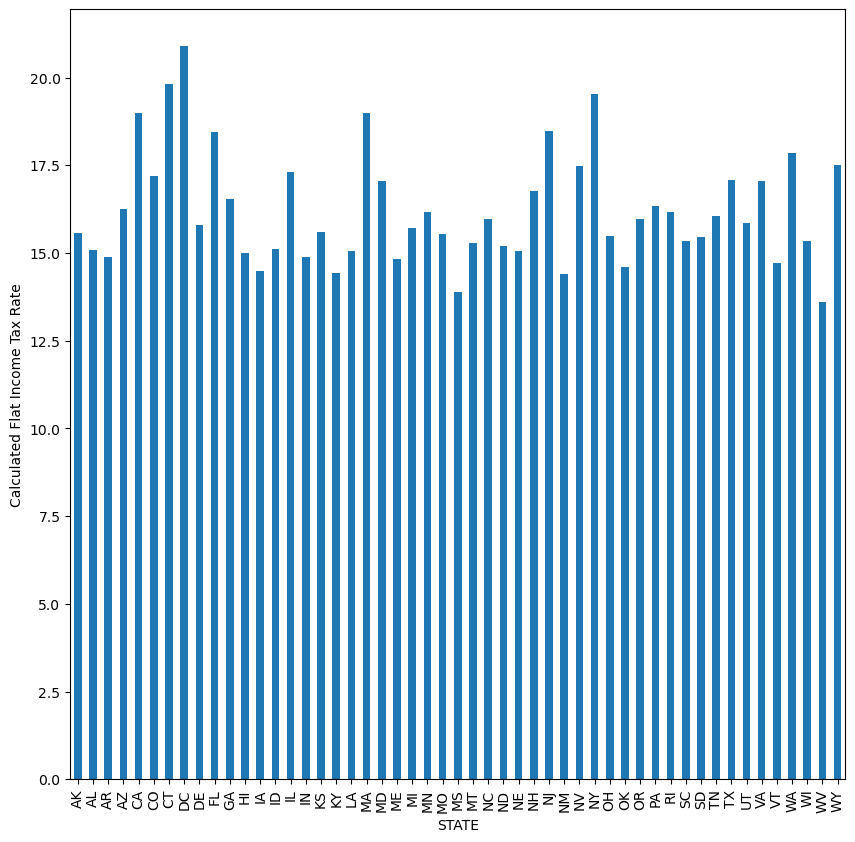

In [10]:
plt.figure(figsize=(10, 10))
plt.xlabel('State')
plt.ylabel('Calculated Flat Income Tax Rate')
gp.flat_income_tax_rate.plot.bar()

There is not a ton of variation between these rates

Now that we know more about the data, I want to confirm how to get the average incomes of people as the numbers I was previously getting did not make sense with the income ranges

In [11]:
gp2 = df.groupby(['STATE','agi_stub'])[['N1','A00100']].sum()
gp2

N1      A00100
STATE agi_stub                      
AK    1         101610.0   1143471.0
      2          80270.0   2941235.0
      3          51510.0   3174361.0
      4          36020.0   3125513.0
      5          60980.0   8376794.0
...                  ...         ...
WY    2          64350.0   2354897.0
      3          42490.0   2622659.0
      4          29580.0   2573978.0
      5          45660.0   6243046.0
      6          12810.0  11154490.0

[306 rows x 2 columns]

In [12]:
gp2['income_per_person'] = gp2.A00100*1000/gp2.N1
gp2.tail(30)

N1       A00100  income_per_person
STATE agi_stub                                          
VT    1          99140.0    1148706.0       11586.705669
      2          87650.0    3226417.0       36810.233885
      3          52010.0    3189397.0       61322.764853
      4          32120.0    2784505.0       86690.691158
      5          49100.0    6857468.0      139663.299389
      6          14390.0    6204294.0      431153.161918
WA    1         901150.0   11319954.0       12561.675637
      2         878150.0   32195832.0       36663.248875
      3         569800.0   35129344.0       61652.060372
      4         388020.0   33652965.0       86729.975259
      5         665330.0   91736083.0      137880.575053
      6         328440.0  166181742.0      505972.908294
WI    1         874100.0   10273075.0       11752.745681
      2         721870.0   26567102.0       36803.166775
      3         452380.0   27794586.0       61440.793139
      4         299130.0   25961101.0       86788.690536
      5         445950.0   60080399.0      134724.518444
      6         125380.0   60260256.0      480620.960281
WV    1         285060.0    3465208.0       12156.065390
      2         198290.0    7167795.0       36148.040748
      3         113000.0    6963361.0       61622.663717
      4          72920.0    6361513.0       87239.618760
      5          92910.0   12578215.0      135380.637176
      6          18580.0    7359041.0      396073.250807
WY    1          81990.0     991378.0       12091.450177
      2          64350.0    2354897.0       36595.135975
      3          42490.0    2622659.0       61724.146858
      4          29580.0    2573978.0       87017.511832
      5          45660.0    6243046.0      136728.996934
      6          12810.0   11154490.0      870764.246682

These numbers seem to align with the income brackets.

Interestingly, it seems that most states have incomes around 12k, 36k, 61k, 135k for agi_stub groups 1,2,3,4,5 respectively. There is a lot more variation in the agi_stub 6 group

### Initial Investigation into number of returns

In [13]:
df.N1 == df.mars1 + df.MARS2 + df.MARS4 

6         False
7         False
8         False
9         False
10         True
          ...  
166447    False
166448    False
166449    False
166450    False
166451    False
Length: 166146, dtype: bool

In [14]:
number_unaccounted_for_returns = df.N1 - df.mars1 - df.MARS2 - df.MARS4
number_unaccounted_for_returns.describe()

count    166146.000000
mean         22.047296
std          46.208257
min        -350.000000
25%           0.000000
50%          10.000000
75%          30.000000
max        2080.000000
dtype: float64

Do not quite understand how their are rows with unaccounted for returns and rows with too many returns being accounted for

<AxesSubplot: >

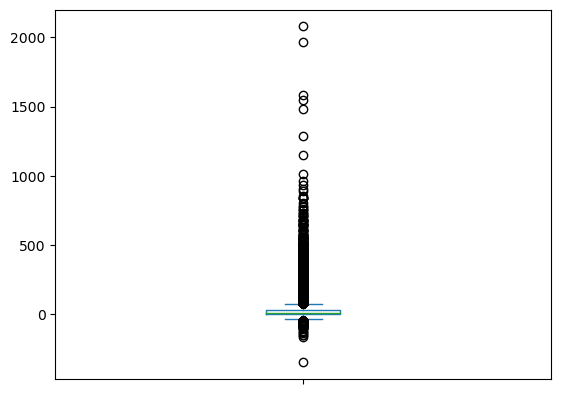

In [15]:
number_unaccounted_for_returns.plot.box()

In [16]:
df.N02650

6         1460.0
7         1400.0
8         1020.0
9          630.0
10         810.0
           ...  
166447    3490.0
166448    2350.0
166449    1700.0
166450    2560.0
166451     830.0
Name: N02650, Length: 166146, dtype: float64

In [17]:
df.N18300/df.N1

6         0.013699
7         0.021429
8         0.078431
9         0.111111
10        0.135802
            ...   
166447    0.017192
166448    0.038298
166449    0.041176
166450    0.097656
166451    0.325301
Length: 166146, dtype: float64

In [18]:
returns_total_paid = df.groupby(['agi_stub'])[['N1','N18300']].sum()
returns_total_paid['percentage'] = returns_total_paid.N18300/returns_total_paid.N1 * 100
returns_total_paid

,N1,N18300,percentage
agi_stub,,,
1,50434370.0,652790.0,1.294336
2,38987940.0,1443670.0,3.702863
3,22584830.0,2137030.0,9.462236
4,14269770.0,2033940.0,14.253488
5,22379400.0,4816140.0,21.520416
6,9270090.0,4224220.0,45.568274


This seems really interesting and should be investigated further, it seems as though as the income becomes higher, people are much more likely to pay taxes in full